<a href="https://colab.research.google.com/github/Isaac-Gathere/DATA-SCIENCE/blob/main/Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import tensorflow as tf

In [ ]:
# Load the data from the file
data = pd.read_csv("/content/drive/MyDrive/datafolder/simulated_data_tottrans.csv")

# Get the percentage of NAs in each column
na_percentages = data.isna().mean() * 100

# Print the percentage of NAs in each column
print("Percentage of NAs in each column:")
print(na_percentages)


Percentage of NAs in each column:
rlb_location_key            49.653122
age_primary_customer        48.562934
state_primary_customer       0.792864
zip_primary_customer        49.256690
oldest_account_tenure_fn    49.355798
                              ...    
TOTAL_FEE_TRANS_OCT22       49.157582
TOTAL_FEE_NOV22              0.891972
TOTAL_FEE_TRANS_NOV22       46.977205
TOTAL_FEE_DEC22             51.734390
TOTAL_FEE_TRANS_DEC22       51.238850
Length: 729, dtype: float64


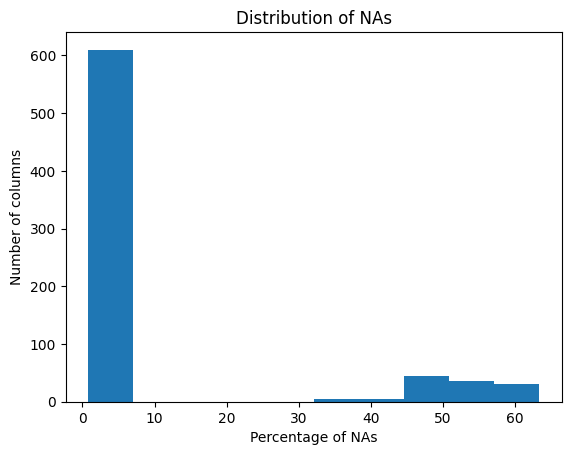

In [ ]:
# Create a histogram of the percentage of NAs in each column
plt.hist(na_percentages, bins=10)
plt.xlabel("Percentage of NAs")
plt.ylabel("Number of columns")
plt.title("Distribution of NAs")
plt.show()

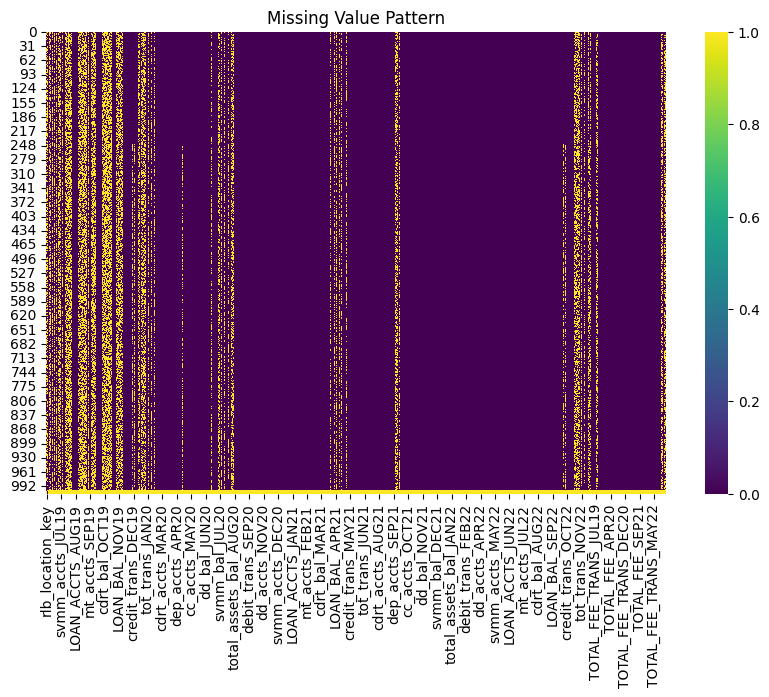

In [ ]:
# Plot the missing value pattern
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis')
plt.title('Missing Value Pattern')
plt.show()

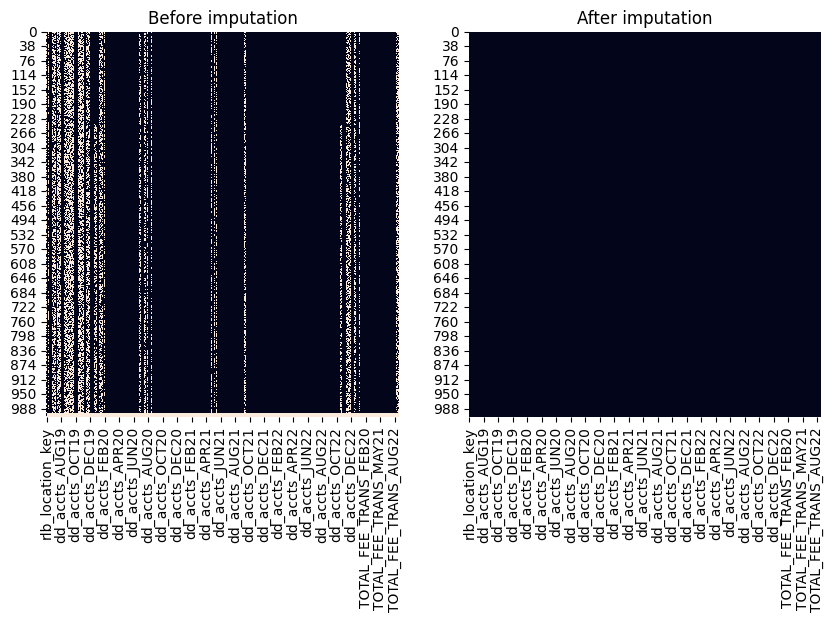

In [ ]:
import seaborn as sns

# Impute missing values with most frequent for non-numeric and median for numeric columns
numeric_imputer = SimpleImputer(strategy="median")
non_numeric_imputer = SimpleImputer(strategy="most_frequent")

numeric_cols = data.select_dtypes(include=np.number).columns
non_numeric_cols = data.select_dtypes(exclude=np.number).columns

data_imputed = data.copy()
data_imputed[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])
data_imputed[non_numeric_cols] = non_numeric_imputer.fit_transform(data[non_numeric_cols])

# Create a heatmap of missing values before and after imputation
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.set_title("Before imputation")
sns.heatmap(data.isnull(), cbar=False, ax=ax1)
ax2.set_title("After imputation")
sns.heatmap(data_imputed.isnull(), cbar=False, ax=ax2)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert non-numeric data to numeric using LabelEncoder
label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col].astype(str))

# Check for missing values after conversion
print('Number of missing values in each column after label encoding:')
print(data.isnull().sum())

# Impute the missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Check for missing values after imputation
print('Number of missing values in each column after imputation:')
print(imputed_data.isnull().sum())


Number of missing values in each column after label encoding:
rlb_location_key            501
age_primary_customer        490
state_primary_customer        0
zip_primary_customer        497
oldest_account_tenure_fn    498
                           ... 
TOTAL_FEE_TRANS_OCT22       496
TOTAL_FEE_NOV22               9
TOTAL_FEE_TRANS_NOV22       474
TOTAL_FEE_DEC22             522
TOTAL_FEE_TRANS_DEC22       517
Length: 729, dtype: int64
Number of missing values in each column after imputation:
rlb_location_key            0
age_primary_customer        0
state_primary_customer      0
zip_primary_customer        0
oldest_account_tenure_fn    0
                           ..
TOTAL_FEE_TRANS_OCT22       0
TOTAL_FEE_NOV22             0
TOTAL_FEE_TRANS_NOV22       0
TOTAL_FEE_DEC22             0
TOTAL_FEE_TRANS_DEC22       0
Length: 729, dtype: int64


Number of missing values in each column after imputation:
rlb_location_key            0
age_primary_customer        0
state_primary_customer      0
zip_primary_customer        0
oldest_account_tenure_fn    0
                           ..
TOTAL_FEE_TRANS_OCT22       0
TOTAL_FEE_NOV22             0
TOTAL_FEE_TRANS_NOV22       0
TOTAL_FEE_DEC22             0
TOTAL_FEE_TRANS_DEC22       0
Length: 729, dtype: int64


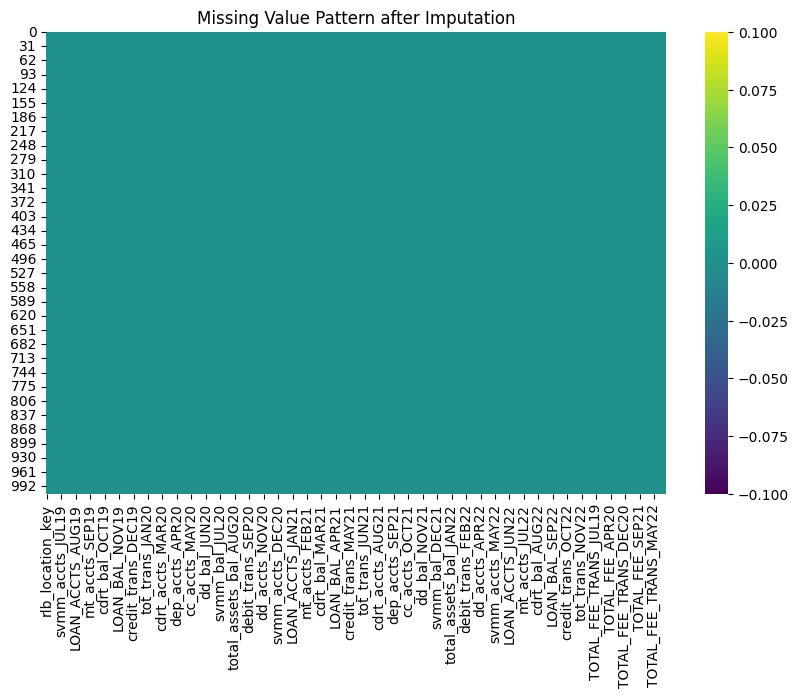

In [ ]:
# Impute the missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Check for missing values after imputation
print('Number of missing values in each column after imputation:')
print(imputed_data.isnull().sum())

# Plot the missing value pattern after imputation
plt.figure(figsize=(10, 6))
sns.heatmap(imputed_data.isnull(), cmap='viridis')
plt.title('Missing Value Pattern after Imputation')
plt.show()